In [1]:
cr = pd.read_csv('C:/Users/shubh/Pranjal Sir class/fwd/CreditRisk.csv')
cr.Credit_History = cr.Credit_History.fillna(1)
cr.Gender = cr.Gender.fillna("Male")
cr.Married = cr.Married.fillna("No")
cr.Dependents = cr.Dependents.fillna(0)
cr.Self_Employed = cr.Self_Employed.fillna("Yes")
cr.LoanAmount = cr.LoanAmount.fillna( cr.LoanAmount.mean() )

cr.Loan_Amount_Term = cr.Loan_Amount_Term.fillna(cr.Loan_Amount_Term.mean())
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cr.Loan_Status = le.fit_transform(cr.Loan_Status)

cr.Gender = le.fit_transform(cr.Gender)
cr.Married = le.fit_transform(cr.Married)
cr.Education = le.fit_transform(cr.Education)
cr.Self_Employed = le.fit_transform(cr.Self_Employed)
cr.Property_Area = le.fit_transform(cr.Property_Area)

cr1 = cr
from sklearn.model_selection import train_test_split
cr = cr.iloc[: , 1::]
cr_train , cr_test = train_test_split(cr, test_size = .2)


<IPython.core.display.Javascript object>

In [3]:
cr_train_x = cr_train.iloc[:,0:-1]
cr_train_y = cr_train.iloc[:,-1]

cr_test_x = cr_test.iloc[:,0:-1]
cr_test_y = cr_test.iloc[:,-1]

# Naive Bayes

In [4]:
from sklearn.naive_bayes import MultinomialNB

In [5]:
nb_cr = MultinomialNB()
nb_cr.fit(cr_train_x, cr_train_y)

MultinomialNB()

In [6]:
pred_cr_nb = nb_cr.predict(cr_test_x)

In [7]:
from sklearn.metrics import confusion_matrix

In [9]:
tab_nb = confusion_matrix(pred_cr_nb,  cr_test_y)
tab_nb

array([[30, 70],
       [26, 71]], dtype=int64)

In [10]:
# prediction with decision tree

In [11]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(cr_train_x, cr_train_y)
dt_pred = dt.predict(cr_test_x)
tab_dt = confusion_matrix(dt_pred,  cr_test_y)
tab_dt

array([[ 38,  19],
       [ 18, 122]], dtype=int64)

In [12]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(cr_train_x, cr_train_y)
rfc_pred = rfc.predict(cr_test_x)
tab_rfc = confusion_matrix(rfc_pred,  cr_test_y)
tab_rfc

array([[ 34,   3],
       [ 22, 138]], dtype=int64)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(cr_train_x, cr_train_y)
dt_pred = dt.predict(cr_test_x)
tab_dt = confusion_matrix(dt_pred,  cr_test_y)
tab_dt

In [16]:
Acc_dt = tab_dt.diagonal().sum()*100/ tab_dt.sum()
Acc_nb = tab_nb.diagonal().sum()*100/ tab_nb.sum()
Acc_rfc = tab_rfc.diagonal().sum()*100/ tab_rfc.sum()
print(Acc_dt)
print(Acc_nb)
print(Acc_rfc)

81.21827411167513
51.26903553299493
87.30964467005076


## KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [19]:
knn.fit(cr_train_x, cr_train_y)

KNeighborsClassifier()

In [20]:
pred_knn = knn.predict(cr_test_x)

In [21]:
tab_knn = confusion_matrix(pred_knn, cr_test_y)
tab_knn

array([[ 11,  18],
       [ 45, 123]], dtype=int64)

In [26]:
l1 = list(range(1,50))
Acc_all = []
for i in l1:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(cr_train_x, cr_train_y)
    pred_knn = knn.predict(cr_test_x)
    tab_knn = confusion_matrix(pred_knn, cr_test_y)
    Acc = tab_knn.diagonal().sum()*100/ tab_knn.sum()
    Acc_all.append(Acc)
print(Acc_all)    

[58.88324873096447, 55.83756345177665, 68.02030456852792, 60.40609137055838, 68.02030456852792, 64.9746192893401, 69.54314720812182, 63.95939086294416, 70.05076142131979, 67.51269035532995, 71.06598984771574, 70.05076142131979, 72.58883248730965, 72.58883248730965, 74.11167512690355, 74.61928934010152, 73.60406091370558, 72.58883248730965, 72.58883248730965, 71.57360406091371, 71.57360406091371, 70.55837563451777, 72.08121827411168, 71.57360406091371, 72.08121827411168, 71.57360406091371, 71.06598984771574, 72.08121827411168, 71.57360406091371, 71.06598984771574, 71.06598984771574, 71.06598984771574, 71.57360406091371, 71.57360406091371, 71.57360406091371, 71.57360406091371, 71.57360406091371, 71.57360406091371, 71.57360406091371, 71.57360406091371, 71.57360406091371, 71.57360406091371, 71.57360406091371, 71.57360406091371, 71.57360406091371, 71.57360406091371, 71.57360406091371, 71.57360406091371, 71.57360406091371]


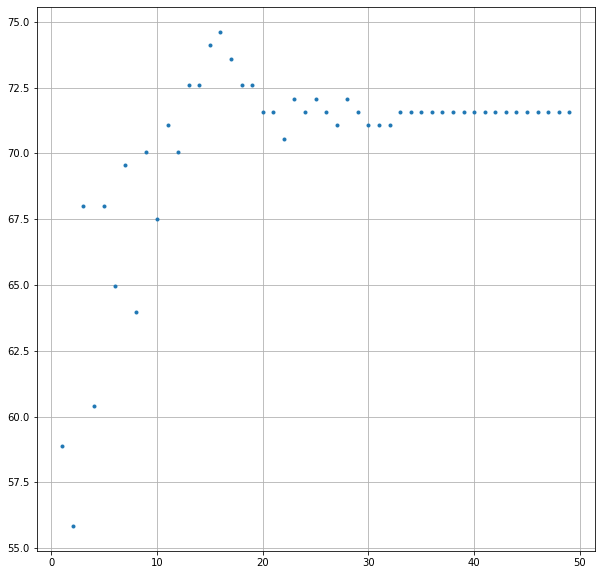

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(l1,Acc_all, ".")
plt.grid()